# Spotify Data Explored and Visualized 
The following exploration covers a dataset of music on spotify. It will cover the diferent attributes of each song and determine songs things like popularity, quality, and audience response. 
## Questions being answered
- Which genre has the best song
- Which country song is the most popular
- Is the theory that louder songs are better true
- Is there a connection between song tempo and danceability
- How does the popularity between four top genres compare
- Who is the most popular artist

In order to do this effectivly, the data needs to be cleaned of any duplicates, as well as removing useless data like track_id and Unnamed: 0. 

In [151]:
# Importing libraries
import pandas as pd
import numpy as nm
import random
import matplotlib.pyplot as plt
import seaborn as sns

# loading data and cleaning
df = pd.read_csv('train.csv')
df = df.drop('track_id', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df = df.drop_duplicates(subset=['track_name'])

# outputting the first ten rows to use as reference
df.head(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


The above dataframe shows the different attributes researched and tested to create the data. It covers 125 different genres and about 90,000 different tracks. 

## Genre exploration based on popularity 
We will now explore those different genres and determine which has the most popular tracks. 

In [152]:
# sorting values based on their popularity in descending order
maxPopularity = df.sort_values('popularity', ascending=False)

# outputting top 10 songs
maxPopularity.head(10)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
20008,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
67356,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
67359,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,5,-5.198,0,0.2530,0.09930,0.000291,0.1260,0.187,106.672,4,latin
67358,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin
79000,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4,piano
67559,Bad Bunny,Un Verano Sin Ti,Efecto,96,213061,False,0.801,0.475,7,-8.797,0,0.0516,0.14100,0.000017,0.0639,0.234,98.047,4,latin
67500,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti,Ojitos Lindos,95,258298,False,0.647,0.686,3,-5.745,0,0.0413,0.08000,0.000001,0.5280,0.268,79.928,4,latin
67603,Bad Bunny,Un Verano Sin Ti,Moscow Mule,94,245939,True,0.804,0.674,5,-5.453,0,0.0333,0.29400,0.000001,0.1150,0.292,99.968,4,latin


As you can see in the above dataframe, the genre dance has a song with the highest popularity rating of 100. While this is listed as the most popular track, latin is a dominant and consistent genre within the top ten. 

## Most popular track in the country genre

Now diving into a specific genre, the following looks for the most popular country song in the dataset. 

In [153]:
# filtering out all other genres but country
df2 = maxPopularity.loc[maxPopularity['track_genre'] == 'country']

# outputting top ten songs
df2.head(10)


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
19652,Morgan Wallen,You Proof,You Proof,86,157477,False,0.731,0.850,9,-4.913,1,0.0336,0.25200,0.000000,0.6050,0.644,119.706,4,country
19100,Eagles,Hotel California (2013 Remaster),Hotel California - 2013 Remaster,84,391376,False,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,4,country
19853,Bailey Zimmerman,Rock and A Hard Place,Rock and A Hard Place,84,207540,False,0.582,0.568,1,-7.300,1,0.0275,0.57700,0.000000,0.1050,0.394,121.991,3,country
19664,Cole Swindell,Stereotype,She Had Me At Heads Carolina,82,206106,False,0.607,0.912,8,-3.449,1,0.0611,0.12400,0.000000,0.3320,0.722,134.944,4,country
19710,Luke Combs,The Kind of Love We Make,The Kind of Love We Make,82,224426,False,0.608,0.745,1,-4.130,1,0.0277,0.02260,0.000006,0.0942,0.464,102.025,4,country
19904,Morgan Wallen,If I Know Me,Whiskey Glasses,81,234346,False,0.614,0.680,6,-4.580,1,0.0289,0.36900,0.000002,0.1150,0.707,149.959,4,country
19551,Chris Stapleton,Traveller,Tennessee Whiskey,81,293293,False,0.392,0.370,9,-10.888,1,0.0298,0.20500,0.009600,0.0821,0.512,48.718,4,country
19610,Luke Combs,This One's for You Too (Deluxe Edition),Beautiful Crazy,80,193200,False,0.551,0.402,11,-7.431,1,0.0262,0.67600,0.000000,0.0928,0.382,103.313,4,country
19713,Luke Combs,What You See Ain't Always What You Get (Deluxe...,Forever After All,79,232533,False,0.487,0.650,0,-5.195,1,0.0253,0.19100,0.000000,0.0933,0.456,151.964,4,country
19708,Boston,Boston,More Than a Feeling,79,285133,False,0.377,0.681,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4,country


The result is that *You Proof* by Morgan Wallen is the most popular country song. 

## Visulization of popularity based on loudness

One factor of modern songs is how loud it is. The theory is that louder songs sound better. A graph of the variables loudness and popularity will show if this is a true connection. In order to promote efficiency within the program and visualization, a random sample will be taken to reduce the dataframe size.

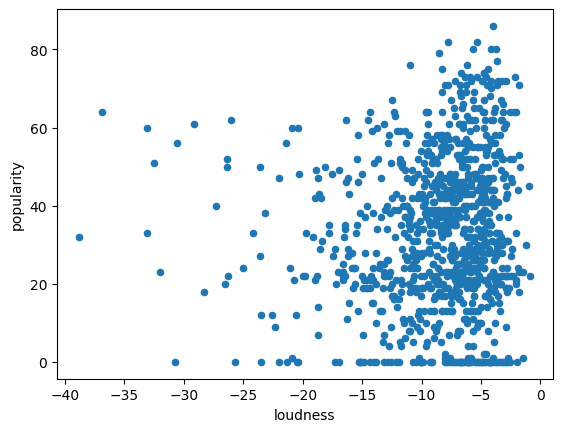

In [154]:
# Taking a random sample to make the graph easier to interpret
random.seed(123)
ranSample = df.sample(n=1000, replace=False)

# Plotting the scatter plot to see if there is a connection between loudness and popularity
plot = ranSample.plot.scatter(x='loudness', y='popularity')


There is a clear connection between loudness and popularity of different tracks. This proves the theory that louder songs sound better and are more popular. 

## Looking at the connection between tempo and danceability

Another connection to look into is the connection between tempo and danceability. Most dance and club songs tend to be a higher tempo so it will be interesting to see how much of a connection there is between the two. 

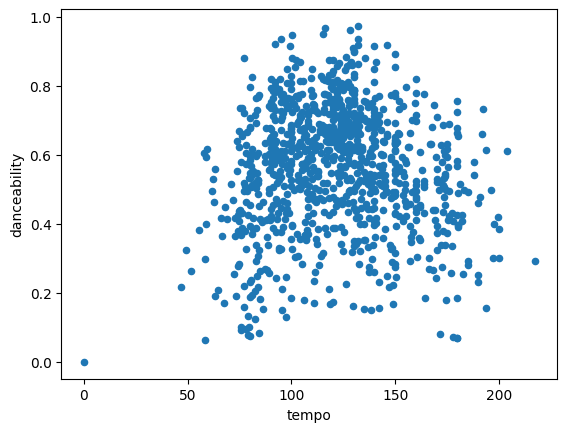

In [155]:
# creating scatter plot to create connection between tempo and danceability
plot2 = ranSample.plot.scatter(x='tempo', y='danceability')

After looking at the scatter plot, it seems there is no clear connection between tempo and danceability

## Comparing the popularity between four top genres

Some modern popular genres are pop, hip-hop, dance, and country, the following pot will compare them. 

<Axes: xlabel='track_genre', ylabel='popularity'>

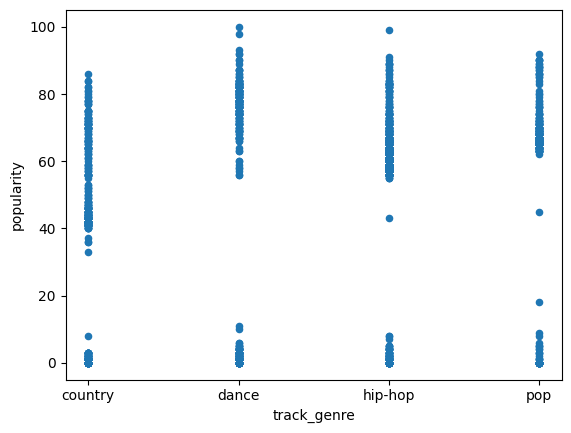

In [156]:
# filtering out all other genres
countryPop = df[df['track_genre'].isin(['country', 'pop', 'hip-hop', 'dance'])]

# creating scatter plot
countryPop.plot.scatter(x='track_genre', y='popularity')

The plot shows that dance has a higher count in the higher popularity songs than any of the others. 

## Finding the most popular artists

The folling will determine who are the top ten artists on spotify by averaging the popularity of their songs. In order to rule out artist that only appear once, only the artists with more than 3 songs will be kept. This is due to the artists variable having values with a featured artist only showing once. This would not give an average for the artist but only the popularity score of that song. 

In [157]:
# removing artists who appear less than 3 times
df = df[df.groupby('artists').artists.transform(len) > 3]
artists = df.groupby('artists')
# getting the mean for each artist
avgPop = artists[['artists', 'popularity']].mean('popularity')

# sorting artists based on popularity in decreasing order
avgPop.sort_values('popularity', ascending=False).head(10)

,popularity
artists,
Bad Bunny,85.363636
Lil Nas X,84.250000
Måneskin,82.600000
Ariana Grande,81.375000
Eminem,79.800000
Mitski,78.400000
LE SSERAFIM,78.000000
MGMT,77.500000
Clairo,76.800000


The results show that Bad Bunny has the highest average popularity score of 85.36. 